# Imports

In [1]:
import glob
import numpy as np
import keras
from keras.preprocessing import image

from keras.applications.vgg16 import VGG16, preprocess_input



C:\Users\queza\Documents\Anaconda\envs\keras\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Ejemplo extracción de características

Ubicación del archivo:  annotations\07\19.png


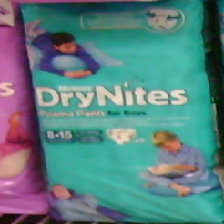

In [2]:
paths = glob.glob("annotations/*/*.png")
ubicacion = paths[150]
print('Ubicación del archivo: ',ubicacion)
img = image.load_img(ubicacion, target_size=(224, 224)) # cargar imagen 
img

In [3]:
# extraccion de caracteristicas
model = VGG16(weights="imagenet", include_top=False, pooling = "avg")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)
print(features.shape)

(1, 512)


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Base de datos

In [5]:

paths = glob.glob("annotations/*/*.png")
n = len(paths)
m = 4 #[name,X,features,ubicacion]
datos = [[0] * m for i in range(n)]



i = -1
for file in glob.glob("annotations/*/*.png"):
    i = i + 1
    name = 'clase '+file[12:14]
    datos[i][0] = name
    img = image.load_img(file, target_size=(224, 224))
    datos[i][3] = file
    x = image.img_to_array(img)
    datos[i][1] = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    datos[i][2] = features
    

    
    
    
    
    

### Ejemplo base de datos

In [6]:
from matplotlib import pyplot as plt

ejemplo1 = datos[200]
print('Ejemplo 1 es de: ', ejemplo1[0] )

ejemplo2 = datos[150]
print('Ejemplo 2 es de: ', ejemplo2[0])

Ejemplo 1 es de:  clase 09
Ejemplo 2 es de:  clase 07


## COMPARACIÓN Y ORDENAMIENTO

In [52]:
"""
Inputs:
imagen : imagen de entrada en 224x224 pixeles
data: base de datos, es una lista [nombre, imagen, features]
N: 


"""
def comparacion(imagen,data,N):
    x = image.img_to_array(imagen)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x) # extraccion de caractericas
    
    # comparar con distancia L2
    
    lista = [0]*338 # 338 elementos en la galerias
    dtype = [('name', '|U16'), ('L2', float),('ubicacion', '|U32')]
    L2 = np.array(lista, dtype=dtype) 
    
    
    
    for i in range(0,len(L2)):
        distancia =  features - data[i][2]
        metrica = np.sqrt(np.dot(distancia,np.transpose(distancia)))
        name = data[i][0]
        ubicacion = data[i][3]
        tupla = (name,metrica, ubicacion)
        L2[i] = tupla
    L2 = np.sort(L2, order=['L2'])
    
    N_mejores = L2[1:(N+1)]
    return N_mejores

        
# se debe establecer un umbral para filtrar        
    
    
    
    
    
    
    

IMAGEN PRODUCTO CLASE 1: Preen ORIGINAL


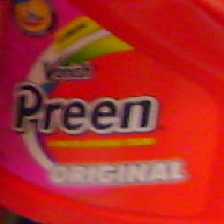

In [53]:
imagen = image.load_img(paths[0], target_size=(224, 224))
print('IMAGEN PRODUCTO CLASE 1: Preen ORIGINAL')
imagen

In [54]:
# COMPARACIÓN BASE DE DATOS
print('10 imágenes más parecidas')
comparacion(imagen,datos,10)

10 imágenes más parecidas


array([('clase 01', 36.73540497, 'annotations\\01\\4.png'),
       ('clase 01', 41.9479866 , 'annotations\\01\\5.png'),
       ('clase 01', 47.54020309, 'annotations\\01\\11.png'),
       ('clase 01', 48.22262192, 'annotations\\01\\12.png'),
       ('clase 01', 49.97544479, 'annotations\\01\\25.png'),
       ('clase 01', 52.2826767 , 'annotations\\01\\14.png'),
       ('clase 01', 56.0003624 , 'annotations\\01\\21.png'),
       ('clase 01', 56.73800659, 'annotations\\01\\18.png'),
       ('clase 01', 57.54559326, 'annotations\\01\\16.png'),
       ('clase 01', 58.32058716, 'annotations\\01\\2.png')],
      dtype=[('name', '<U16'), ('L2', '<f8'), ('ubicacion', '<U32')])

## Medidas de desempeño

Hay 238 elementos en la galería, son en total 10 clases.

### 1. Rank N

In [55]:
# promedio de aciertos de los N más parecidos


"""
N_parecidas = lista de duplas con nombre de la clase y distancia de las N imagenes más parecidas
clase imagen = entero que indica la clase de la imágen
"""
def aciertos(N_parecidas, clase_imagen):
    N = len(N_parecidas)
    contador = 0
    for i in range(0,N):
        clase_i =  int(N_parecidas[i][0][6:8])
        if clase_imagen == clase_i:
            contador = contador + 1
    return contador
        
        
    
aciertos_galeria = np.zeros(238) # cantidad de acierto por imagen
i = -1
for file in glob.glob("annotations/*/*.png"):
    i = i + 1
    if file[12:14] != '11':
        # elementos de la galerias
        imagen = image.load_img(file, target_size=(224, 224))
        N_parecidas = comparacion(imagen,datos,1)
        clase_imagen = int(file[12:14])
        aciertos_galeria[i] = aciertos(N_parecidas, clase_imagen)

     
        
        

In [56]:
aciertos_galeria

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [57]:
imagen = image.load_img(paths[200], target_size=(224, 224))
N_parecidas = comparacion(imagen,datos,4)

In [58]:
N_parecidas

array([('clase 09', 40.25251007, 'annotations\\09\\15.png'),
       ('clase 09', 41.12077713, 'annotations\\09\\16.png'),
       ('clase 09', 41.30654526, 'annotations\\09\\25.png'),
       ('clase 09', 41.88037491, 'annotations\\09\\22.png')],
      dtype=[('name', '<U16'), ('L2', '<f8'), ('ubicacion', '<U32')])

In [59]:
clase_imagen = int(paths[200][12:14])
aciertos(N_parecidas, clase_imagen)

4

### 2. Rank o Rank promedio 

In [60]:
def rank(N_parecidas, clase_imagen):
    N = len(N_parecidas)
    contador = 0
    rank = 0
    for i in range(0,N):
        clase_i =  int(N_parecidas[i][0][6:8])
        if clase_imagen == clase_i:
            R_i = i   # posicion imagen en la consultas
            contador = contador + 1
            rank = rank + R_i    # comienza a contar desde la posición cero
            
    rank_promedio = rank/contador
    return rank_promedio

        

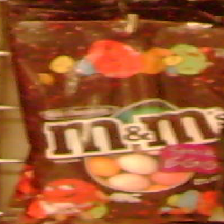

In [61]:
imagen = image.load_img(paths[200], target_size=(224, 224))
imagen

In [62]:
N_parecidas = comparacion(imagen,datos,338)

In [63]:
clase_imagen = int(paths[200][12:14])
rank(N_parecidas, clase_imagen)

16.0

In [64]:
# rank galeria

rank_galeria = np.zeros(238) # cantidad de acierto por imagen
i = -1
for file in glob.glob("annotations/*/*.png"):
    i = i + 1
    if file[12:14] != '11':
        # elementos de la galerias
        imagen = image.load_img(file, target_size=(224, 224))
        N_parecidas = comparacion(imagen,datos,338)
        clase_imagen = int(file[12:14])
        rank_galeria[i] = rank(N_parecidas, clase_imagen)
        
rank_galeria

array([ 23.        ,  29.24      ,  26.64      ,  18.04      ,
        15.44      , 130.92      ,  13.52      ,  38.16      ,
        19.76      , 132.6       ,  24.68      ,  23.84      ,
        24.        ,  25.24      ,  24.68      ,  29.        ,
        21.36      ,  21.92      ,  21.56      ,  30.52      ,
        20.24      ,  35.24      ,  19.84      ,  33.04      ,
        20.24      ,  26.68      ,   9.        ,  80.52631579,
         9.        ,   9.        ,   9.        ,   9.05263158,
         9.05263158,   9.05263158,   9.84210526,   9.        ,
         9.        ,   9.        ,   9.        ,   9.        ,
         9.        ,  15.36842105,   9.        ,   9.73684211,
         9.05263158,   9.        ,  10.78947368,  15.78947368,
        10.21052632,  14.31578947,  80.52631579,  16.63157895,
        10.10526316,  15.78947368,  13.89473684,  22.21052632,
        10.36842105,  16.84210526,   9.78947368,  16.36842105,
        14.36842105,   9.84210526,  14.21052632,  12.10

# Evaluación cualitativa

## 1. Imágenes que no pertenecen a la galería
### 1.1 Imagen 1

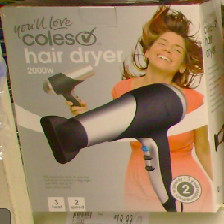

In [84]:
ubicacion1 = paths[300]
imagen = image.load_img(ubicacion1, target_size=(224, 224))
imagen






In [85]:
N_parecidas = comparacion(imagen,datos,5)

    

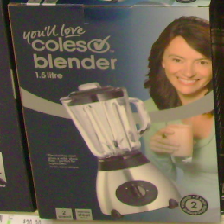

In [86]:
image.load_img(N_parecidas[0][2], target_size=(224, 224))

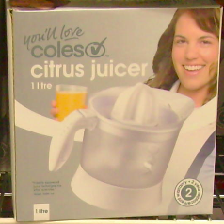

In [87]:
image.load_img(N_parecidas[1][2], target_size=(224, 224))

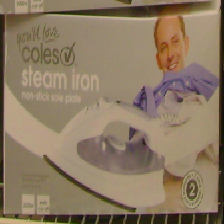

In [88]:
image.load_img(N_parecidas[3][2], target_size=(224, 224))

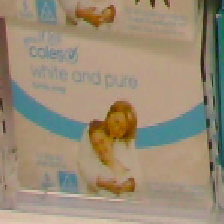

In [89]:
image.load_img(N_parecidas[4][2], target_size=(224, 224))

### 1.2 Imagen 2

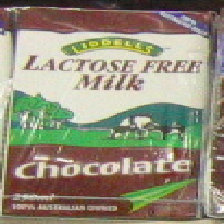

In [90]:
ubicacion1 = paths[250]
imagen = image.load_img(ubicacion1, target_size=(224, 224))
imagen

1 imagen más parecida


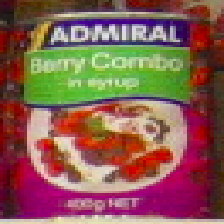

In [97]:
N_parecidas = comparacion(imagen,datos,5)
print('1 imagen más parecida')
image.load_img(N_parecidas[0][2], target_size=(224, 224))


Segunda imagen más parecida


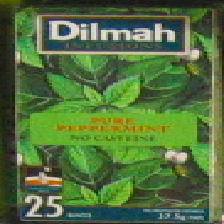

In [98]:
print('Segunda imagen más parecida')
image.load_img(N_parecidas[1][2], target_size=(224, 224))

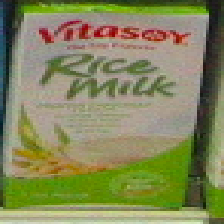

In [93]:
image.load_img(N_parecidas[2][2], target_size=(224, 224))

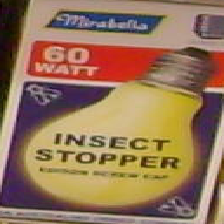

In [94]:
image.load_img(N_parecidas[3][2], target_size=(224, 224))

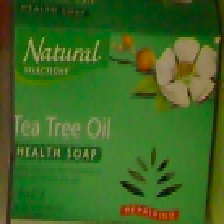

In [100]:
image.load_img(N_parecidas[4][2], target_size=(224, 224))


In [101]:
N_parecidas

array([('clase 11', 63.27047729, 'annotations\\11\\Seleccion_234.png'),
       ('clase 11', 64.2793808 , 'annotations\\11\\Seleccion_248.png'),
       ('clase 11', 65.57743073, 'annotations\\11\\Seleccion_239.png'),
       ('clase 05', 65.57920837, 'annotations\\05\\8.png'),
       ('clase 11', 65.58345795, 'annotations\\11\\Seleccion_267.png')],
      dtype=[('name', '<U16'), ('L2', '<f8'), ('ubicacion', '<U32')])

In [104]:
aciertos_galeria = np.zeros(338) # cantidad de acierto por imagen
i = -1
for file in glob.glob("annotations/*/*.png"):
    i = i + 1
    if file[12:14] != '12':
        # elementos de la galerias
        imagen = image.load_img(file, target_size=(224, 224))
        N_parecidas = comparacion(imagen,datos,5)
        clase_imagen = int(file[12:14])
        aciertos_galeria[i] = aciertos(N_parecidas, clase_imagen)
aciertos_galeria

array([5., 5., 5., 5., 5., 4., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 2., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 2.,
       5., 5., 4., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5.,
       5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 3., 3., 5., 5., 5., 5., 5., 5., 5., 2., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

(338,)